# Project: Analysing Patient Appointments Database 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#question_1">Questions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The project is aimed at investigating the datasets from over a 100K Brazilians who are shedulled for appointments at specific times. The analysis mostly focuses on whether or not patients showed up for thier respective appointments As well as the factors responsible for contributing to these responses, the relationships between the columns and many others.
In this project, we would be analyzing isnsights such as: 
>  * *What was the percentage of those who showed up to those that did not for the overall dataset?What is the gender distribution for the overall appointments turn out?*
>  * *Does any form of defect or addiction, affect a patients chances of showing up? What is total effect these factors have on a patient's show up  response?*
>  * *Which age group showed up the most for the appointments?*


***A number of characteristics about the patient are included in each row:***
## Column Descriptions
* ***PatientId*** **:** info for ID numbers for every patient visit
* ***AppointmentID*** **:** Apointment ID Number.
* ***Gender*** **:** Sex of the patient.
* ***ScheduledDay*** **:** tells us on what day the patient set up their appointment.
* ***AppointmentDay*** **:** tells us on what day the patient would have their session.
* ***Age*** **:** how old the patient is.
* ***Neighbourhood*** **:** indicates the location of the hospital.
* ***scholarship*** **:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* ***Hipertension*** **:** indicates whether or not the patient has Hipertension
* ***Diabetes*** **:** indicates whether or not the patient is diabetic
* ***Alcoholism*** **:** indicates whether or not the patient is alcoholic
* ***Handcap*** **:**  indicates whether or not the patient is handicapped
* ***SMS_received*** **:** indicates whether or not the patient had received an sms
* ***No-show*** **:** indicates whether or not the patient had showed up for the appointment
* Be careful about the encoding of the **last column** : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if  they did not show up.


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Dataset Overview

In [26]:
# Loading dataset 
df = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [27]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
list(df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

*see above for column descriptions...*

*The ***column names*** seem not to be consistent in terms of their naming as there are both ***underscores*** "_" and ***hyphens*** "-" present in their naming*

In [29]:
# Taking a look at the shape of the data
df.shape

(110527, 14)

## ***Getting much more insights about the data involed***
>* *Checking data types present as well as presence of NULL values among columns, duplicates and any possible error of the data*

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Accessment of the above info
*  *There are equal number of non-null values for all the columns which is equivalent to the number of entries, in this case the RangeIndex above,hence, indicating there are no null values within the dataset*
*  *The Patient and Appointment ID's seem to have different data types*
*  *The schedulled and appointement days seem to have a string datatype. It would be much appropriate to change this to a date-time data type looking at the values in their respective columns*

### Cheking for duplicates within the dataset

In [31]:
#Checking for duplicates
sum(df.duplicated())  

0

*There seems to be no duplictes within the data set hence implying all rows have unique entries from each other*

### General statistical accessment of the data
*  *A brief statistical description of the whole dataset*

In [32]:
# A general statistical description of the whole dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*  *The minimum value of age seem to be less than zero giving an incorrect data value within the dataset.*
*  *The ***Handcap*** column seems to be mispelled and giving a maximum value of 4 which seems odd as looking at what it represents(whether patient is handicapped or not). Lots of factors could be considered looking at this column from every indication. ***Could there be errors in the input values?*** OR ***Could there be different levels of being handicapped***. These would be analyzed when looking at the cleaning section later on.*

<a id='cleaning'></a>
# Cleaning and Improving Data Content

***Renaming and making all cloumn names lower for easy assesment in my case, hence preventing minute errors and being much more efficient and consistent***
>  * *Columns names seems slightly disorganized thus the need ensure consistency in naming.*
>  * *spaces and underscores are known to course problems in python programmes thus removing and replacing them would ease difficulties in the future.*
>  * *Underscores on the other hand are known to integrate well with python codes thus, the need to replace most characters with them.*
>  * *Mispelling of column names (Handcap instead of Handicap)*
>  * *Incorrect data values*
>  >  * *Negative values for ages.*
>  >  * *Handicap condition which is more likely to be true or false usually represented by "***1***" and "***0***" seems to have values as high as "***4***" from the brief description making data within the column suspicious.*
>  >  * *Also, the spelling ***handcap*** rather than what we assume to be ***handicap*** .*

In [33]:
#making all coloumn names lower and replacing any possible spaces " " and replacing hiphens"-" with and underscore
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "_"), inplace=True)

#renaming multiple columns at the same time
df.rename(columns={'patientid': 'patient_id','appointmentid': 'appointment_id','scheduledday': 'scheduled_day','appointmentday': 'appointment_day'}, inplace=True)

###  **Verify that the data frame is as espected**
*  *Ensuring changes implied to the column names has taken effect within the dataframe*
*  *This could prevent future issues with the data*

In [34]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**As ID values are generally unique, It is advisable to check the unique number of ID for the whole dataset**

In [35]:
df['appointment_id'].nunique(),df['patient_id'].nunique()

(110527, 62299)

*The results ***clearly identifies more unique Appointment ID numbers*** than Patient ID numbers ***which may imply that***, the same patients may be booked for different Appointments hence, would not be advisable to drop any of such rows at the moment*

### Converting ID data types
*The ID columns in this case would be better to all have the same data types, in this case an integer*

In [36]:
# checking patient_id and appointment_id data types
df['patient_id'].dtype, df['appointment_id'].dtype

(dtype('float64'), dtype('int64'))

In [37]:
df.patient_id.nunique(),df.appointment_id.nunique()

(62299, 110527)

In [38]:
# converting patient_id and account_id data types to strings
df['patient_id'] = df['patient_id'].astype('str')
df['appointment_id'] = df['appointment_id'].astype('str')

*verify change for the patient_id and appointment_id data types*

In [39]:
df['patient_id'].dtype, df['appointment_id'].dtype

(dtype('O'), dtype('O'))

In [40]:
df.patient_id.nunique(),df.appointment_id.nunique()

(62299, 110527)

### Inspecting the age attribute
> ***A negative number for the age clearly depicts an incorrect data since age is most likely less than zero. The maximum age which was 115 seems to be possible thus, we would maintain anything postive in our case for the age group***
>  * *Now lets find out if there may be more of such values*

In [41]:
# checking for negative ages within the datset
df.loc[:, :].query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,465943158731293.0,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


***There appears to be only one instance of this case***
*  *Since there is only one instance for this, lets drop this row within the data*

In [42]:
# dropping negative age values
df.drop([99832], axis = 0, inplace = True)

***verify if row has been dropped***
*  *In this case, recheck if negative age values still exist with the dataset*

In [43]:
df.loc[:, :].query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


*Also ***note*** that the number of entries for the data set would be reduced by one as a result of this.Verify by determining the shape of the dataset again*

In [44]:
# checking data shape
df.shape

(110526, 14)

*As noted the, the number of rows is now reduced by one*

### Addressing scheduled and appointment date columns

In [45]:
# checking data types
df['scheduled_day'].dtype, df['appointment_day'].dtype

(dtype('O'), dtype('O'))

*convert these data types to date-time objects*

In [46]:
# convert scheduled and appointment days format to date time 
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], format='%Y-%m-%d %H:%M:%S')
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format='%Y-%m-%d %H:%M:%S')

*Verify date_time change implimented to scheduled and appointment day data types*

In [47]:
# checking data type of days once again
df['scheduled_day'].dtype, df['appointment_day'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

***strip time from date formats since it would not be used in our case***
*  *This would also make our scheduled and appointment day values much cleaner*

In [48]:
# strip time from days for much  cleaner values
df['scheduled_day'] = df['scheduled_day'].dt.strftime('%Y-%m-%d')
df['appointment_day'] = df['appointment_day'].dt.strftime('%Y-%m-%d')

*Check data to verify changes made*

In [49]:
# checking data output
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


*verify data types for scheduled and appointment days again*

In [50]:
# re-checking data types
df['scheduled_day'].dtype, df['appointment_day'].dtype 

(dtype('O'), dtype('O'))

### Rename no_show column name
The column name ***no_show*** with its values ***"No"*** meaning patient did show up for appointment and ***"Yes"*** meaning patient did not show up for appointment appears slightly confusing thus the need for amendment.
> *  *It would be less confusing when the colm ***no_show*** is renamed as ***showed_up*** with ***Yes*** representing a patient did show up and a ***NO*** represent a patient not showing up*

In [51]:
# renaming no_show to showed_up for easy recognition
df.rename(columns = {'no_show':'showed_up'}, inplace = True)
# replacing "no" with "yes" and "yes" with "no" in showed_up column
df = df.replace({'showed_up':{'No':'Yes', 'Yes':'No'}})

***Verify changes made to showed_up column***

In [52]:
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438.0,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951.0,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes


***Verify if Yes and No are the only values present for the showed_up column***

In [53]:
# checking whether Yes and No were only values present
df['showed_up'].value_counts()

Yes    88207
No     22319
Name: showed_up, dtype: int64

***Verify the data type for showed_up column***

In [54]:
df['showed_up'].dtype

dtype('O')

### Cleaning the Handicap column
*The handicap column gives us a lot to think about.*
>  *  *The spelling ***"handcap"*** seems to be incorrect*.
>  *  *Could the values inputed be incorrect or Could there be different levels of a patient being handicapped that is, being amputated considered first_degree handicap while being amputated and blind considered second_degree and so on. In this case it would imply a patients level of handicap is proportional to the number of defects associated with that patient.*

*This column seems quite tricky. Lets first rename ***handcap*** as ***handicap*** for this column.*

***Rename handcap as handicap***

In [55]:
# renaming hand cap to handicap
df.rename(columns = {'handcap':'handicap'}, inplace = True)

In [56]:
# Verifying change of column name
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


*Lets now take a look at the unique values and their associated counts within this column*

In [57]:
# checking for unique handcap values present
df['handicap'].nunique()
# Checking for the count for each unique hancap value
df['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

***making amendments to the different handicap values***
>  *  *In our case ***we would consider as being handicapped or not handicapped***. We would want to assume those with values of ***0*** as not being handicapped and set the remaining values that is , from ***1*** to ***4*** as being handicapped.*

In [58]:
# Replacing handicap values with assumed level of being handicapped 
df['handicap'] = np.where(df['handicap']>0, 1, 0) # where df['handicap'] is greater than 0, replace with 1 else use 0

***Verify changes made to handicap column***

In [59]:
# checking changes made by verifying counts for each
df['handicap'].value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

In [60]:
df.handicap.dtype

dtype('int32')

### Inspecting gender column
***check all unique values within gender column***
> * *The espected number of unique values in this column is 2 that is, male and female. Any other number would imply the data would have to be looked at from a different perspective in one way or the other*

In [61]:
# Checking number of unique values within the gender column
df['gender'].nunique()
# Checking unique values as well as thier counts within the gender column
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

*The above implies there are only 2 unique values from this column within the data of which complies with what we espect*

### Inspecting scholarship, diabetes, alcoholism and sms_received columns
> *For these columns, the expected unique value is 2 for each as it only checks whether or not the patient enrolled in Brasillia wellfare program in terms of the scholarship, was diabetic, alcoholic or received and sms prior to the appointment day*

In [62]:
# Checking number of unique values within the schorlaship column
df['scholarship'].nunique()
# Checking unique values as well as thier counts within the scholarship column
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [63]:
# Checking number of unique values within the diabetes columns
df['diabetes'].nunique()
# Checking unique values as well as thier counts within the diabetes column
df['diabetes'].value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [64]:
# Checking number of unique values within the alcoholism columns
df['alcoholism'].nunique()
# Checking unique values as well as thier counts within the alcoholism column
df['alcoholism'].value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [65]:
# Checking number of unique values within the sms_received columns
df['sms_received'].nunique()
# Checking unique values as well as thier counts within the sms_received column
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

*The value for ***2*** for each unique value search within these columns as well as the value counts of ***"0"*** and ***"1"*** for these columns implies they are good to work with at this stage*

In [66]:
df.shape

(110526, 14)

### Save dataframe as new file
>  *This would prevent us from running the whole file since we are working in a notebook in this case hence, working directly with the new data*

In [67]:
df.to_csv('noshow_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

*We've now cleaned our data to the best of our knowledge hence, the need to find out a much within the data set as well as visualize them. Compute statistics and create visualizations with the goal of addressing the research questions that posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.*

***Lets first have a look at our data again to begin the exploration process***

In [68]:
df_cl = pd.read_csv('noshow_cleaned.csv')
df_cl.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes


In [69]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110526 entries, 0 to 110525
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110526 non-null  float64
 1   appointment_id   110526 non-null  int64  
 2   gender           110526 non-null  object 
 3   scheduled_day    110526 non-null  object 
 4   appointment_day  110526 non-null  object 
 5   age              110526 non-null  int64  
 6   neighbourhood    110526 non-null  object 
 7   scholarship      110526 non-null  int64  
 8   hipertension     110526 non-null  int64  
 9   diabetes         110526 non-null  int64  
 10  alcoholism       110526 non-null  int64  
 11  handicap         110526 non-null  int64  
 12  sms_received     110526 non-null  int64  
 13  showed_up        110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*The datatype for the patient_id and the appointment_id seems to have switched back to its default data type. since we would not need this for our analysis we would leave it as such unless otherwise*

In [70]:
df_cl.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*Lets find the shape of the dataset to know the number of entries made*

In [71]:
df_cl.shape

(110526, 14)

*Lets now tackle each question at a time*

<a id='question_1'></a>
# What was the percentage of those who showed up to those that did not for the overall dataset? What is the gender distribution for the overall appointments turn out?

*Lets first find the total number of patients within the data*

In [72]:
# checking unique counts for patient and appointment ID's
df_cl.patient_id.nunique(),df_cl.appointment_id.nunique()

(62298, 110526)

*This implies there are ***62,298*** unique Patients of whom some may have more than one appointments id's*

*Lets now find out the number of these that showed up for their appointments and those that did not*

In [73]:
# checking number of appointments present for people who did and did not show up for appointment
a = df_cl.query('showed_up =="Yes"').patient_id.count() #those who showed up to appointment
b = df_cl.query('showed_up =="No"').patient_id.count() # those that did not show up for the appointment
a,b

(88207, 22319)

* ***NOTE***: that, the count here is not unique hence two occurances of the same id nuumber here may be as a result of the patient having more than one appointment. In effect the value displayed here is the count of appointment id's associated with that patient hence each occurance of the patient id is considered differently for the count function, ***hence the number 88,207 exceeding the actual number of patients itself***.*

In [74]:
#checking those count of those that showed up and did not show up
showed = df_cl.query('showed_up =="Yes"').count()[0] # returns the first index of the count for all the columns as they are all the same in this case
not_show = df_cl.query('showed_up =="No"').count()[0]

*Lets now plot a graph to display the above data*

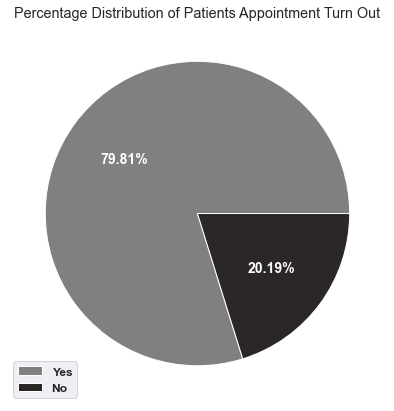

In [75]:
#visual display of those that showed up to tha=ose that did not
plt.figure(figsize=(16,7))
font = {'weight':'bold','size':12}
plt.rc('font', **font)
color = ['grey', '#2A2726']
plt.pie([showed, not_show], colors = color, autopct='%.2f%%', textprops={'color':"w",'fontsize': 14}) #autopct sets percentages, to 2dp in our case, textprops sets percentage color,size
plt.title('Percentage Distribution of Patients Appointment Turn Out')
# plt.rc({'font':14, 'axes':20})
# plt.rc('font'(14))
plt.legend(labels=df_cl['showed_up'].unique(), loc='lower left')
plt.show()

***Gender distribution for the overall attendance***

In [76]:
#checking number of appointments that showed up by gender
df_cl.loc[df_cl['showed_up'] == 'Yes']['gender'].value_counts()

F    57245
M    30962
Name: gender, dtype: int64

*Of the total of the ***88,207*** appointments that showed up, about ***64.97%*** of them were females while the remaining percentage (approximately ***35.14%***) were males.*

In [77]:
#checking number of appointments that did not show up by gender
df_cl.loc[df_cl['showed_up'] == 'No']['gender'].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

*Of the ***22319*** appointments that did not show up, about ***65.38%*** were females and the remaining of (approximately ***34.61%***) were males*

<AxesSubplot:ylabel='Gender'>

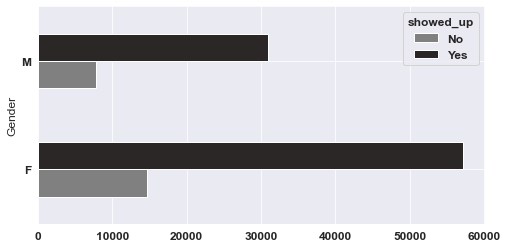

In [78]:
#ploting a graph to view the relation between the gender groups and the attendance for appointments
gender = df_cl.groupby(['gender', 'showed_up'])['gender']
color = ['grey', '#2A2726']
gender.count().unstack('showed_up').plot(kind='barh',color =color,xlabel='Gender', ylabel='Number of Patients',figsize=(8,4), stacked=False)

*All instances of the graph shows femles showed up more than males and also females not showing up more as well.*

# Does any form of defect or addiction, affect a patients chances of showing up? What is total effect these factors have on a patient's show up  response?

*Lets first define a general function to use in computing values for patients with and without any of the diseases (hipertension, diabetes, alcoholism, handicapped) who did and did not show up for the appointments*

In [106]:
#brief function for defining brief stats about people with diseases
def stats(x):
    """
    Takes one argument which is the any disease of defect in the column in this case
    
    Prints:
    (list) showed Up - people with and without disease that showed up
    (list) not showed up - people with and without disease that did not show up
    """
    showed = df_cl.loc[df_cl['showed_up'] == 'Yes'][x].value_counts()
    not_show = df_cl.loc[df_cl['showed_up'] == 'No'][x].value_counts()
    print("showed Up     : {}\nnot showed up : {} ".format(list(showed), list(not_show)))
    
#function to visualize those with and without disease to their appointment show up
def visualize(column):
    """
    Takes one argument which is the any disease of defect in the column in this case
    
    Returns:
    graph: A Visualization of the argument compares to patient appointment show up
    """
    color = ['grey', '#2A2726']
    df_cl.groupby([column, 'showed_up'])[column].count().unstack('showed_up').plot(kind='bar',color =color, stacked=False, rot=0)
    # Adding title and formating it
    plt.title(f'Count of Appointments That Did Show/ Not Show Up: {column}'.title(), fontsize = 14, weight = "bold")
    # Adding x label and formating it
    plt.xlabel(column.title(), fontsize = 14, weight = "bold")
    # Adding y label and formating it
    plt.ylabel('Frequency'.title(),fontsize = 14, weight = "bold")

In [107]:
#calling the function stats on diabets
stats('diabetes') # function displaying diabetes stats

showed Up     : [81694, 6513]
not showed up : [20889, 1430] 


*  result = ***[those_without_diabetes , those_diabetes]*** 

*The result shows out of the ***88,207*** appointment id's that showed up for appointment, about ***92.62%***(equivalent to 81,694 appointments) were non-diabetic. This implies about ***7%***(equivalent to 6,513) of the appointments_id's that showed up were diabetic. Also, about ***6.41%*** of people who did not show up for the appointments were diabetic*

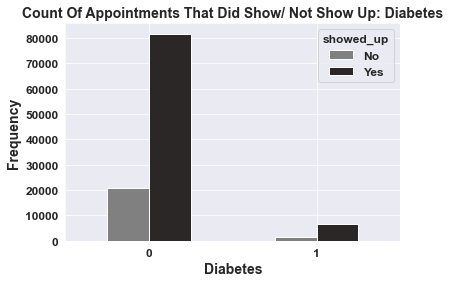

In [108]:
visualize('diabetes')

*The graph indicates in any instance, whether diabetic or not, people that showed up were more compared to those that did not*

In [109]:
stats('hipertension')

showed Up     : [70178, 18029]
not showed up : [18547, 3772] 


*Indicates that about ***20.44%*** of patients that showed up for appointments were hipertensive while almost ***16.9%*** of those that did not show up were hipertensive*

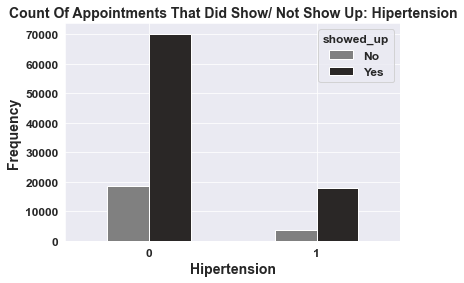

In [110]:
visualize('hipertension')

*The graph indicates in any instance, whether with hipertension or not, people that showed up were more compared to those that did not*

In [111]:
stats('alcoholism')

showed Up     : [85524, 2683]
not showed up : [21642, 677] 


*About ***3.04%*** of patients that showed up were alcoholic while ***29.19%*** of those that did not show up were alcoholic*

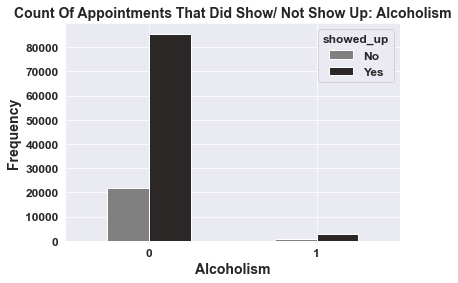

In [112]:
visualize('alcoholism')


*Again in all instances, be it alcoholic or non alcoholic, those that showed up were more.*

In [113]:
stats('handicap')

showed Up     : [86373, 1834]
not showed up : [21912, 407] 


*About ***2.08%*** of patients that showed up were handicappd while those that did not show up were made of ***1.82%*** handicapped patients*

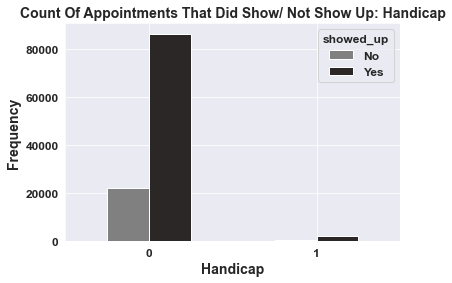

In [114]:
visualize('handicap')

*Then again, those that showed up, be it handicapped or not, were always more*

***Compairing overall diseases to show Up turn out***

In [115]:
# creating a new column 
conditions = [(df_cl.hipertension.eq(1) | df_cl.diabetes.eq(1) | df_cl.alcoholism.eq(1) | df_cl.handicap.eq(1)), df_cl.hipertension.eq(0) & df_cl.diabetes.eq(0) & df_cl.alcoholism.eq(0) & df_cl.handicap.eq(0)] # conditions for creating column
choices = [1, 0] #values within new column
df_cl['disease'] = np.select(conditions, choices) #chooses values based on conditions

*verify column added*

In [116]:
# checking for disease column
df_cl.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,showed_up,disease
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,0


In [117]:
stats('disease')

showed Up     : [66511, 21696]
not showed up : [17603, 4716] 


*The stats shows about ***24.60%*** of those that showed up were had at least one disease(hipertension, diabetes, alcoholism, handicap) while those that did not show up consits of about ***21.13%*** of people with at least one of the diseases* 

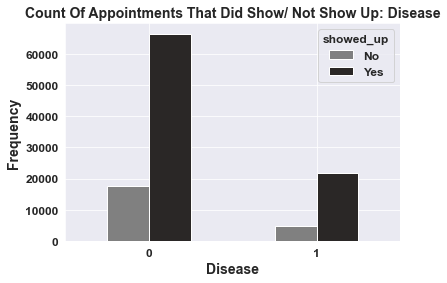

In [118]:
visualize('disease')



# Which age group showed up the most for the appointments?

*Lets first have a look the ages with the number of patients that showed up for that age.*

In [119]:
# checking the total number of patients with ages in the data that showed up 
df_cl[df_cl["showed_up"]=="Yes"]['age'].value_counts().sum()
df_cl[df_cl["showed_up"]=="Yes"]['age'].nunique() #checking number of unique ages within data

103

In [120]:
# checking the number present for each individual age
df_cl[df_cl["showed_up"]=="Yes"]['age'].value_counts() #sorts the values in descending order

0      2900
1      1858
52     1449
56     1372
2      1366
       ... 
98        5
100       4
102       2
115       2
99        1
Name: age, Length: 103, dtype: int64

*The above shows childeren aged ***0*** and ***1*** showed up the most for appointments for the ***103*** different ages within the data. In as much as age ***52*** and ***56*** were the ***3rd*** and ***4th*** most present respectively. The data is also espected to be hightened for the younger ages as age ***2*** also had a large attendance*

***Lets now try and get a visual display of the data above***
>  *  *We would define a function that would choose the boundaries for our data.*
>  *  *Depending on how we choose to group the ages, the graph would give different outcomes*

[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120.]


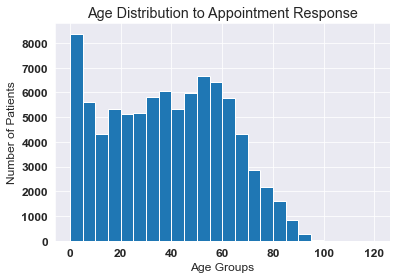

In [121]:
#creating function to plot age distribution data
def cal_histogram_bins(data, desired_bin_size):
    """
    Takes two argument (dataframe, the size of bin you would want to use)
    
    returns:
    (list): List of integers ranging from the min to the max value of the data inputed spaced out equally by bin size inputed
    """
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

if __name__ == '__main__':
    data = df_cl[df_cl["showed_up"]=="Yes"]['age']
    bins = cal_histogram_bins(data, 5.0)
    print(bins)
    plt.hist(data, bins=bins)
    plt.xlabel('Age Groups')
    plt.ylabel('Number of Patients')
    plt.title('Age Distribution to Appointment Response')
    plt.grid(True)
    plt.show()

*The graph illustrates a normal distribution to age ***50***. Looking at this same graph ***from age 50*** shows it skewed towards the right as the age kept increasing.*

<a id='conclusions'></a>
## Conclusions

> * **Note** : **" ~ "** denoted beside the figures indicates approximations* 

***What was the percentage of those who showed up to those that did not for the overall dataset? What is the gender distribution for the overall appointments turn out?***

>  *There are a total of ***62,298*** unique patients with ***110,526*** unique appointment id's. Out of the ***62,298*** patients, There were ***88,207*** of their appointments_id's, which makes up about ***79.81%*** of the number of appointment_ids that did show up for their appointments while the other ***~20.19%*** were those that did not show up for their appointment. This implies more people showed up on average than those that did not*

>  *Of the ***88,207*** appointments that showed up, ***57,245***(64.97%) of these were females while the other ***30,962***(35.14%) were males. ***22,319*** persons that did not show up, (about ***65.38%*** of those that did not show up) were females and the remaining of (approximately ***34.61%*** of those that did not show up) were males. This implies more females did show up than men basically as a result of the huge difference in terms of numbers between the gender gaps*

***Does any form of defect or addiction, affect a patients chances of showing up? What is total effect these factors have on a patient's show up  response?***

***Diabetes***
>  * *Of the 7943 diabetic patients appointments, about ***82%*** of them did show up which in general made up about ***7%*** of the total number that showed up. Only ***18%*** of these diabetic patients did not show up for their appointments which makes up about ***6.4%*** of the total patients that did not show up for their appointment.* 
>  * *It can be hence, be infered from this data that, being diabetic hardly affects your chances of not showing up for appointments*

***Hipertension***
>  * *Of the total ***21807*** hipertensive patients appointments, about ***82.68%*** of them showed up for their appointments while the remaining **17.3%*** did not show up.Further computations showed about ***20.44%*** of patients that showed up for appointments were hipertensive while almost ***16.9%*** of those that did not show up were hipertensive* 
>  * *Since more than ***80%*** of the hipertensive patients showed up, the chances of not showing up is very minimal hence should not affect the appointment turn out*

***Alcoholism***
>  * *The was a total of ***3,360*** appointments for alcoholic patients of which about ***79.85%*** of this figure did show up for their appointments. The remaning ***~20.15%*** that were alcoholic appointments and did not show up for the appointments were about ***29.19%*** of the total number of appointments that did not show up for their appointments* 
>  * *From this it implies being alcoholic decreases your chances of not showing up for an appointment by about ***20.15%*** which is somehow good.*

***Handicap***
>  * *The total number of people handicapped appointments in our data was ***2,241***. About ***81.84%*** of them did show up of their appointments. The remaining ***~18.16%*** of the handicapped appointments made up about ***1.82%*** of the total of appointments that did not show up for their appointments* 
>  * *Again the chances of not showing up for an appointment was far less for alcoholic patients as well from the insights derrived fro this data*

***All defects and diseases***
>  * *In total there was a total of ***26,412*** appointments with either of the above conditions(alcohol, hypertension, handicap and diabetes). Of this figure, ***82.14%*** of them did show up for their appointments which did contribute to ***24.60%*** of the total number of appointment_ids that showed up for their appointments. The remaining ***~17.86%*** of those that had either of the above conditions and did not show up for their appointments were about ***21.13%*** of the total appointments_ids that did not show up for their appointments* 
>  * *Then again, having any of the conditions mentioned above barely decreases your chances for not showing up for an appointment. There is a more than ***80%*** chance of you making it up for appointments if a patient has any of the conditions above*

***Which age group showed up the most for the appointments?***

*The value counts for the dataset within the age column indicates there were ***103*** unique ages present within the dataset. Of these, there were ***99*** number of times each value was counted. That means, some ages may occured the same number of times when counted. Grouping the data into a bin size of 5 indicates the ages from ***0 through 5*** had the most attendance followed by those between the ages of ***50 and 55***. Hence grouping the ages into 24 different parts with each part consisting of 5 different ages of our value counts, the ages between ***0 to 5*** showed up the most. The age group specified here are very young children which may imply parents may have been very coucious of the health of their children as well.*

<a id='limitations'></a>
# Limitations

***Different factors may affect the quality of the conclusions drawn from our dataset. The various assumptions used for our analysis includes :***
>  *  ***age :*** The assumption of negative values to be incorrect and hence dropping them from the dataset
>  *  ***handicap :*** The assumption that, every figure above ***0*** consisted of patients with a handicapped condition in our data.
>  *  ***bins :*** Grouping of bins with a value of ***5*** in our case showed ages ***0 to 5*** were the most present. However, using a different bin value may have yielded a different age group with the highest peaks for the same dataset 
